# Text Mining 

In [11]:
!pip install -U spacy

In [12]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 5.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
conda install -c conda-forge wordcloud=1.6.0

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/anaconda3

  added / updated specs:
    - wordcloud=1.6.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38h50d1736_0        16.9 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.6.0            |   py38h0b31af3_0         168 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.0 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-6

In [28]:
## perform sentimental amalysis
import pandas as pd ## data processing
import numpy as np ## linear algebra
import string ## special operation on string 
import spacy ## language model 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [29]:
data = pd.read_csv("//Users//sreeramkn//Downloads//Elon_musk.csv")
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [30]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text preprocessing

In [31]:
data= [Text.strip() for Text in data.Text] ## remove both the leading and the trailing characters
data = [Text for Text  in data if Text] ## remove empty strings, because they are considered in python as False

In [32]:
## joining the list into one string or Text
data_text = ' '.join(data)
data_text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [33]:
## Punctuation
no_punc_text = data_text.translate(str.maketrans('','', string.punctuation)) ## with arguements (x, y, z) where 'x' and 'y'
## must be equal-length string and characters in 'x'
## are replaced by caharcters in 'y'. 'z'
## is a string (string.punctuation here)
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [34]:
## remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won’t give you your private keys should be avoid

In [35]:
## Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/sreeramkn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreeramkn/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'f

In [37]:
## Token couts
len(text_tokens)

21129

In [38]:
## Remove stopwords
import nltk
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It', '’', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

In [39]:
## normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it', '’', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001

In [40]:
## stemming 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it', '’', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'c

In [41]:
## Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 i ’ alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine it ’ getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet ’ give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict ca

In [42]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'I', "'", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyew', 'geoffkeighley', 'unrealengine', 'it', "'", 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', '

In [43]:
clean_tweets = ' '.join(lemmas)
clean_tweets

'kunalb11 I \' alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyew geoffkeighley unrealengine it \' get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet \' give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasonably well star

# Feature Extraction

## 1. Using countvectorizer 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(lemmas)

In [45]:
print(vectorizer.vocabulary_)

{'kunalb11': 2045, 'alien': 230, 'idaacarmack': 1783, 'ray': 2946, 'trace': 3815, 'cyberpunk': 962, 'hdr': 1671, 'nextlevel': 2485, 'have': 1665, 'try': 3849, 'joerogan': 1964, 'spotify': 3442, 'great': 1605, 'interview': 1893, 'gtera27': 1624, 'doge': 1114, 'underestimate': 3981, 'teslacn': 3662, 'congratulation': 856, 'tesla': 3656, 'china': 740, 'amazing': 255, 'execution': 1325, 'last': 2063, 'year': 4248, 'now': 2525, 'next': 2484, 'even': 1295, 'happy': 1652, 'new': 2481, 'ox': 2643, 'frodo': 1489, 'underdoge': 3980, 'all': 232, 'thought': 3741, 'would': 4223, 'fail': 1361, 'himself': 1717, 'owenspark': 2639, 'flcnhvy': 1432, 'anonyx10': 284, 'haha': 1638, 'thanks': 3700, 'indeed': 1832, 'tweet': 3869, 'definitely': 1016, 'represent': 3030, 'realworld': 2971, 'time': 3758, 'allocation': 234, 'the': 3707, 'entertaining': 1252, 'outcome': 2619, 'likely': 2122, 'givedirectly': 1574, 'just': 1992, 'send': 3213, 'agree': 201, 'clubhouse': 781, 'kanyew': 2001, 'geoffkeighley': 1553, 'u

In [46]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/Users/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
print(X.toarray().shape)

(15931, 4282)


## 2.  Countvectorize with N-grams (Bigrams &Trigrams)

In [48]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)


In [49]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'be', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'y

## 3. TF-IDF vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [51]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'de

## Generate word cloud

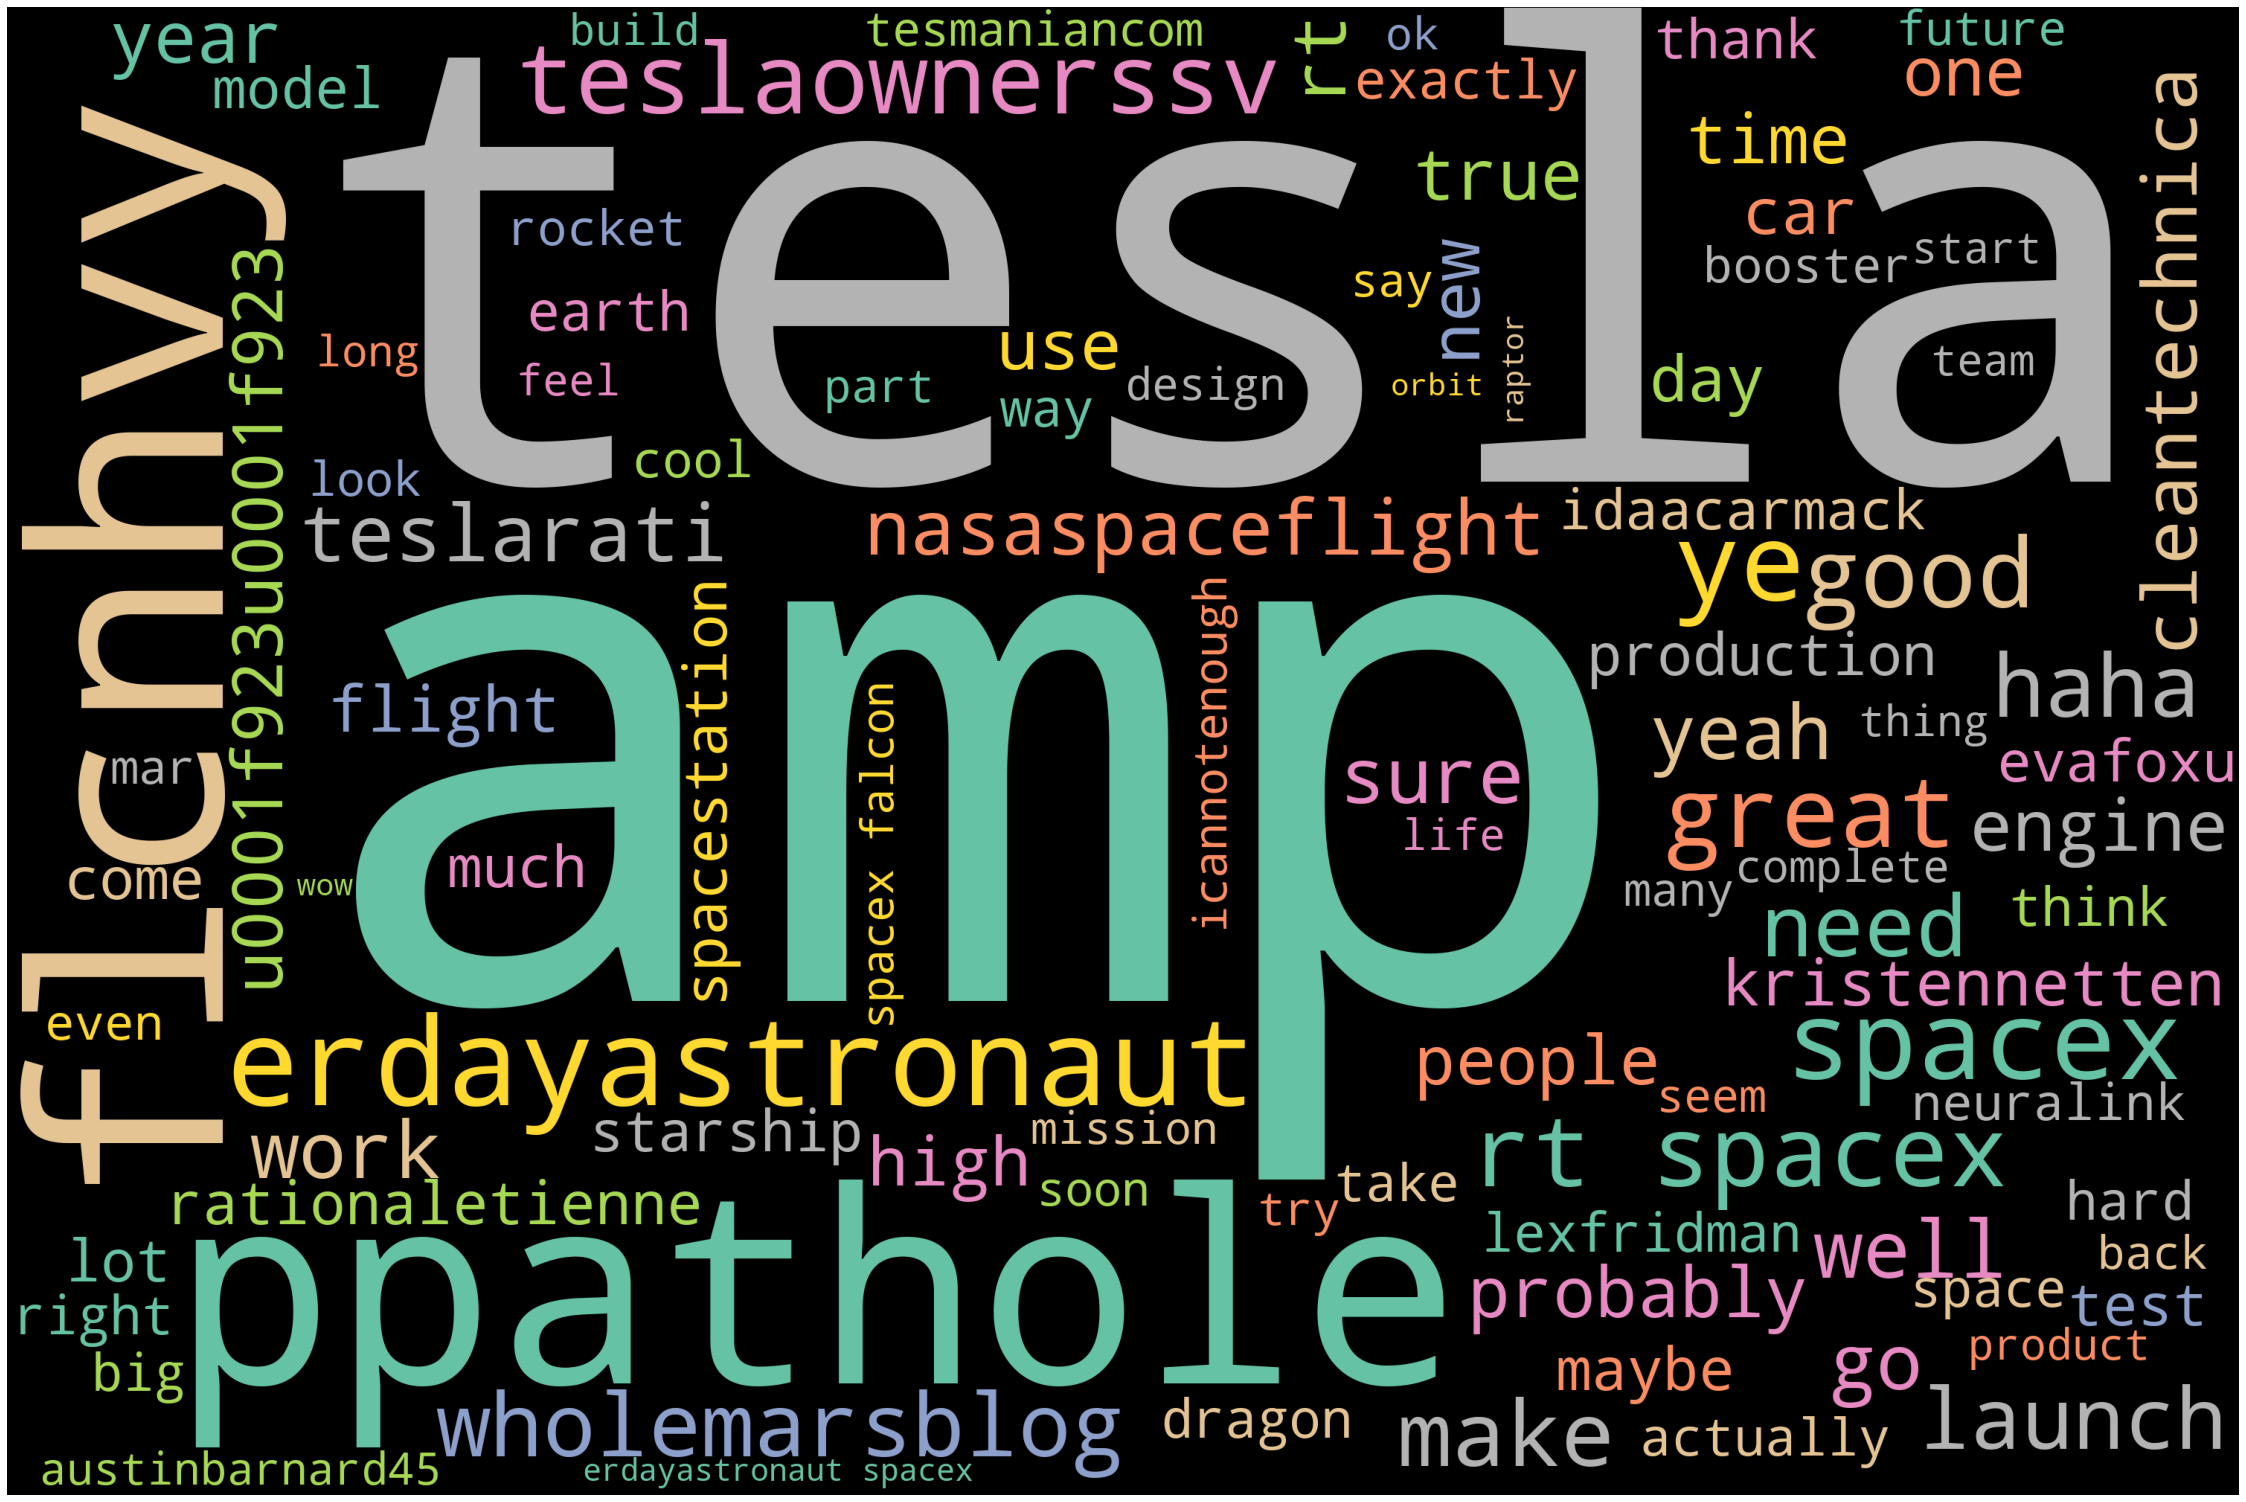

In [52]:
## Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
## Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
## Plot
plot_cloud(wordcloud)

In [53]:
## Part of speech  Tagging

nlp = spacy.load("en_core_web_sm")
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [54]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
I PRON
' VERB
alien ADJ
idaacarmack PROPN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate PROPN
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha VERB
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
just ADV
agree ADJ
clubhouse NOUN
kanyew PROPN
geoffkeighley PROPN
unrealengine VERB
it PRON
' PUNCT
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x NOUN
toddler NOUN
hodler NOUN
joshmanmode NOUN
he PRON
definitely ADV
issue VERB
sentencin

levine NOUN
catchy ADJ
megaconstellati PROPN
aviationintel PROPN
jetcitystar PROPN
you PRON
all PRON
sat VERB
launch NOUN
next ADJ
year NOUN
laser NOUN
link NOUN
only ADV
o INTJ
… PUNCT
megaconstellati PROPN
aviationintel PROPN
jetcitystar PROPN
larrypress PROPN
yup NOUN
teslagong PROPN
teslaownerssv PROPN
cleantechnica PROPN
I PRON
hope VERB
tesmaniancom VERB
these DET
also ADV
laser NOUN
link NOUN
satellite NOUN
ground NOUN
station NOUN
need VERB
poles PROPN
teslaownerssv PROPN
cleantechnica PROPN
sorry ADJ
version NOUN
confusion NOUN
v81 PROPN
say VERB
fsd VERB
separate ADJ
version NOUN
number NOUN
rest NOUN
car NOUN
cleantechnica PROPN
to PART
surprise VERB
tesla NOUN
well INTJ
ai VERB
hardware NOUN
amp NOUN
software NOUN
waymo PROPN
money NOUN
ricguccio VERB
teslaownerssv NOUN
it PRON
float VERB
flcnhvy PROPN
boringcompany PROPN
fallouttheme NOUN
open ADJ
party NOUN
vegas NOUN
loop NOUN
happen VERB
soon ADV
allow VERB
alexebenton PROPN
boringcompany PROPN
u0001f923u0001f923 ADJ
un

yes INTJ
flcnhvy PROPN
ercxspace NOUN
save VERB
mass NOUN
amp NOUN
cost NOUN
leg NOUN
amp NOUN
enable VERB
immediate ADJ
repositioning NOUN
booster NOUN
launch NOUN
mount PROPN
— PUNCT
rea PROPN
… PUNCT
ercxspace NOUN
we PRON
' AUX
go VERB
try VERB
catch VERB
super ADJ
heavy ADJ
booster NOUN
launch NOUN
tower NOUN
arm NOUN
use NOUN
grid NOUN
fin NOUN
take VERB
load NOUN
snakehead ADJ
dog NOUN
undivide ADP
attention NOUN
winderhead DET
ostrich NOUN
came VERB
glide PROPN
nonchalant PROPN
tesmaniancom PROPN
seem VERB
odd ADJ
opposition NOUN
group NOUN
bmw PROPN
' PART
home NOUN
state NOUN
baveria NOUN
that SCONJ
' PUNCT
far ADJ
brande NOUN
… PUNCT
tesmaniancom NOUN
this DET
sensible ADJ
opposition NOUN
anywhere ADV
mean ADJ
progress NOUN
everywhere ADV
harsimranbansal NOUN
literally ADV
tobyliiiiiiiiii ADV
be VERB
sure ADJ
real ADJ
destiny NOUN
destiny NOUN
no DET
escape VERB
all DET
tesla ADJ
car NOUN
deliver VERB
final ADJ
three NUM
day NOUN
year NOUN
get VERB
three NUM
month NOUN
full 

9 NUM
launch NOUN
lc39a NOUN
rt PROPN
erdayastronaut PROPN
there ADV
' PUNCT
something PRON
genuinely ADV
magical ADJ
seeing NOUN
starship NOUN
sn8 PROPN
person NOUN
boca PROPN
chica PROPN
beautiful ADJ
quiet ADJ
serine NOUN
t NOUN
… PUNCT
I PRON
m VERB
gespräch PROPN
mit VERB
mathias PROPN
döpfner PROPN
rt PROPN
spacex VERB
dragon NOUN
separation NOUN
confirm VERB
spacecraft NOUN
way ADV
spacestation ADV
autonomous ADJ
docking NOUN
tomorrow NOUN
approximately ADV
1 NUM
… PUNCT
rt PROPN
spacex VERB
falcon NOUN
9 NUM
booster NOUN
land NOUN
of ADP
course NOUN
I PRON
still ADV
love VERB
you PRON
droneship NOUN
rt PROPN
spacex VERB
liftoff NOUN
haya2ejaxa PROPN
jaxaen PROPN
congratulation PROPN
haya2ejaxa PROPN
congratulation NOUN
rdanglephoto NOUN
spacex VERB
teslarati NOUN
yes INTJ
rt PROPN
boringcompany ADJ
tunnel NOUN
rave NOUN
rationaletienne NOUN
and CCONJ
toilet NOUN
paper NOUN
u0001f923u0001f923 ADJ
watch NOUN
demolition NOUN
man NOUN
prometheus PROPN
unbound PROPN
rt PROPN
spacex 

wall NOUN
the DET
propellant NOUN
use NOUN
either CCONJ
abort ADJ
orbital ADJ
maneuvering NOUN
one NUM
use NOUN
obviate NOUN
dragon NOUN
also ADV
hover VERB
amp NOUN
land NOUN
propulsively ADV
use VERB
parachute ADJ
maximum ADJ
safety NOUN
thruster NOUN
integrate VERB
spacecraft NOUN
enable VERB
abort ADJ
capability NOUN
way NOUN
abort ADJ
increase NOUN
safety NOUN
rt PROPN
nasa PROPN
what PRON
song NOUN
would AUX
play VERB
ride NOUN
launch NOUN
pad PROPN
launchamerica PROPN
rt PROPN
spacex VERB
dragon PROPN
complete ADJ
22 NUM
flight NOUN
spacestation NOUN
it PRON
design VERB
begin VERB
human ADJ
spaceflight PROPN
mi PROPN
… PUNCT
rt PROPN
spacex VERB
dragon PROPN
spacecraft PROPN
currently ADV
fly VERB
capable ADJ
return VERB
significant ADJ
amount NOUN
cargo NOUN
earth NOUN
first ADJ
priv PROPN
… PUNCT
rt PROPN
spacex NOUN
spacex VERB
' PUNCT
customtailore NOUN
suit NOUN
route VERB
communication NOUN
cool ADJ
system NOUN
protect ADJ
crew NOUN
event NOUN
cabin NOUN
depressu NOUN
… PU

christmas PROPN
eve PROPN
2008 NUM
last ADJ
hour NOUN
last ADJ
day NOUN
possible ADJ
investo ADJ
… PUNCT
joshbickett PROPN
ppathole PROPN
yes INTJ
ppathole NOUN
lower ADJ
starlink NOUN
terminal NOUN
cost NOUN
may AUX
sound VERB
rather ADV
pedestrian NOUN
actually ADV
difficult ADJ
technical ADJ
challenge NOUN
itshamzahkhan NOUN
as ADV
soon ADV
get VERB
regulatory ADJ
approval NOUN
hopefully ADV
around ADP
middle ADJ
next ADJ
year NOUN
thesheetztweetz NOUN
right ADV
take VERB
5 NUM
min NOUN
set VERB
future ADJ
improvement NOUN
probably ADV
less ADV
3 NUM
mi NOUN
… PUNCT
kjellarne PROPN
flcnhvy PROPN
canada PROPN
norway PROPN
next ADV
get VERB
we PRON
early ADJ
beta PROPN
ennnafnlaus PROPN
flcnhvy PROPN
didn PROPN
' PART
realize VERB
possible ADJ
no DET
problem NOUN
' PUNCT
way NOUN
get VERB
current ADJ
design NOUN
cybertruck NOUN
approve PROPN
europe PROPN
flcnhvy PROPN
as ADV
soon ADV
get VERB
country NOUN
approval NOUN
this DET
required ADJ
country NOUN
individually ADV
euwide NOUN
ap

conveniently ADV
convert VERB
4 NUM
million NUM
ton NOUN
mass NOUN
energy NOUN
every DET
second ADJ
… PUNCT
kristennetten VERB
teslaownerssv VERB
you PRON
never ADV
know VERB
ppathole NOUN
after SCONJ
xbox PROPN
u0001f622 PROPN
whatsupfranks PROPN
kimpaquette PROPN
also ADV
system VERB
autodelete ADJ
old ADJ
datum NOUN
automatically ADV
default VERB
univercurious ADJ
table NOUN
tension NOUN
kimpaquette PROPN
yes INTJ
teslaownerssv PROPN
start VERB
production NOUN
7 NUM
seater NOUN
next ADJ
month NOUN
initial ADJ
delivery NOUN
early ADJ
december PROPN
the DET
gauntlet NOUN
throw VERB
the DET
prophecy NOUN
fulfil NOUN
model NOUN
s PART
price NOUN
change NOUN
69420 NUM
tonight NOUN
neopork85 NOUN
spacex VERB
nasaspaceflight NOUN
austinbarnard45 INTJ
whoisheartbreak PROPN
erdayastronaut PROPN
felixschlang PROPN
… PUNCT
gem8mingen ADJ
tesla NOUN
congratulation NOUN
teslarati NOUN
make VERB
progress NOUN
9 NUM
meter NOUN
roughly ADV
30 NUM
ft NOUN
diameter NOUN
will AUX
less ADV
roomy VERB
3

mike94160775 PROPN
tesla NOUN
electrekco NOUN
teslarati NOUN
glad ADJ
' PUNCT
ok PROPN
sofiaan PROPN
tesla PROPN
haha PROPN
amoghbhushan PROPN
teslaclubin PROPN
wholemarsblog PROPN
mkbhd PROPN
thank NOUN
wait PROPN
teslaclubin PROPN
wholemarsblog PROPN
mkbhd PROPN
next ADJ
year NOUN
sure ADV
tobyliiiiiiiiii ADV
rationaletienne PROPN
spexcast PROPN
williammbrown PROPN
ppathole PROPN
thesheetztweetz NOUN
waemd NOUN
spacex NOUN
… PUNCT
rationaletienne PROPN
spexcast PROPN
williammbrown PROPN
ppathole PROPN
thesheetztweetz PROPN
waemd NOUN
spacex NOUN
spacexstarlink NOUN
… PUNCT
spexcast PROPN
williammbrown PROPN
rationaletienne PROPN
ppathole PROPN
thesheetztweetz PROPN
waemd NOUN
spacex NOUN
spacexstarlink NOUN
wanationalguard NOUN
great ADJ
williammbrown PROPN
rationaletienne PROPN
ppathole PROPN
thesheetztweetz PROPN
waemd NOUN
spacex NOUN
spacexstarlink NOUN
wanationalguard NOUN
brown PROPN
… PUNCT
ppathole PROPN
thesheetztweetz PROPN
waemd NOUN
spacex NOUN
spacexstarlink NOUN
wanatio

u0001f5a4 NOUN
tjlk VERB
there PRON
eerie VERB
parallel VERB
the DET
bore NOUN
company NOUN
amp NOUN
vaulttec ADV
we PRON
also ADV
build VERB
first ADJ
demonstration NOUN
tunnelvault NOUN
la ADP
double ADJ
underground ADJ
nuclear ADJ
shelter NOUN
u0001f600u0001f44d PROPN
flcnhvy PROPN
lexfridman PROPN
yeah INTJ
tesladri NOUN
idaacarmack NOUN
lexfridman NOUN
should AUX
happen VERB
soon ADV
idaacarmack NOUN
lexfridman NOUN
a DET
bit NOUN
obscure ADJ
starhammer NOUN
amp NOUN
stainless ADJ
steel NOUN
rat NOUN
engineersfee NOUN
at ADP
first ADV
I PRON
think VERB
parrot VERB
johnnacrider1 NOUN
jhall NOUN
they PRON
remind VERB
guy NOUN
story NOUN
life NOUN
tunnel NOUN
city NOUN
selfdrive ADJ
electric ADJ
car NOUN
feel VERB
like ADP
warp ADJ
drive NOUN
first ADJ
operational ADJ
tunnel NOUN
vega NOUN
… PUNCT
jackfarrington PROPN
for ADP
sure PROPN
jackfarrington PROPN
tesla PROPN
good ADJ
point NOUN
have VERB
hug NOUN
tunnel NOUN
today NOUN
arkinv PROPN
aurmanark PROPN
good ADJ
analysis NOUN
pp

device NOUN
friday PROPN
3 NUM
pm NOUN
pacific NOUN
engineersfee PROPN
astronaughty ADJ
owenspark NOUN
ppathole PROPN
erdayastronaut PROPN
dauqhx VERB
universalsci PROPN
no DET
ppathole NOUN
erdayastronaut NOUN
dauqhx VERB
universalsci PROPN
mars PROPN
easy PROPN
moon PROPN
propellant NOUN
production NOUN
could AUX
get VERB
… PUNCT
erdayastronaut PROPN
dauqhx VERB
universalsci PROPN
starship NOUN
propellant PROPN
78 NUM
oxygen NOUN
o2 PROPN
plant NOUN
moon NOUN
would AUX
enou VERB
… PUNCT
waitbutwhy ADV
now ADV
I PRON
want VERB
candy NOUN
dauqhx NOUN
universalsci NOUN
there PRON
' PUNCT
lot NOUN
frozen ADJ
co2 NOUN
amp PROPN
h2o PROPN
mars PROPN
heating NOUN
planet NOUN
densify NOUN
atmosphere NOUN
it PRON
' PUNCT
solvable ADJ
universalsci PROPN
perhaps ADV
one NUM
day NOUN
ocean NOUN
northern PROPN
part PROPN
mars PROPN
jchybow PROPN
jwangark PROPN
wintonark VERB
it PRON
' PUNCT
almost ADV
work VERB
reliably ADV
jwangark ADJ
wintonark ADJ
very ADV
different ADJ
computer NOUN
need VERB

true ADJ
kristennetten ADJ
ppathole NOUN
berniesander NOUN
u0001f923u0001f923 ADJ
ppathole NOUN
berniesander NOUN
over ADP
time NOUN
since SCONJ
give VERB
employee NOUN
share NOUN
ownership NOUN
dilute NOUN
automatically ADV
from ADP
… PUNCT
rt PROPN
theplanetaryguy PROPN
video NOUN
like SCONJ
always ADV
amaze VERB
astronomer PROPN
jan PROPN
koet PROPN
capture NOUN
video NOUN
2007 NUM
saturn NOUN
appear VERB
behind ADP
t NOUN
… SYM
rationaletienne PROPN
berniesander NOUN
I PRON
wonder VERB
read VERB
twitter NOUN
feed NOUN
berniesander NOUN
and CCONJ
aim VERB
attack NOUN
tesla NOUN
' PUNCT
company NOUN
earth NOUN
advance NOUN
… PUNCT
berniesander NOUN
that PRON
bs AUX
push VERB
oil NOUN
amp NOUN
gas NOUN
interest NOUN
distract NOUN
people NOUN
5 NUM
trillion NUM
per ADP
year NOUN
re NOUN
… PUNCT
siconik1 NOUN
wr4nygov PROPN
28delayslater NUM
berniesander NOUN
u0001f3af VERB
wr4nygov AUX
berniesander VERB
good ADJ
analysis NOUN
he PRON
also ADV
include VERB
govt PROPN
loan NOUN
high ADJ


tomcruise NOUN
spacex VERB
could AUX
great PROPN
teslaownerssv PROPN
cleantechnica PROPN
that SCONJ
' PUNCT
great ADJ
idea NOUN
tesla INTJ
we PRON
actually ADV
look VERB
revolutionary ADJ
actuary ADJ
tesla NOUN
insurance NOUN
please INTJ
inquire VERB
interested PROPN
cleantechnica PROPN
tbh NOUN
bit NOUN
less ADV
foolish ADJ
rt PROPN
commercialcrew VERB
while SCONJ
orbit PROPN
astronaut NOUN
astrobehnken VERB
astrodoug NOUN
perform VERB
habitability NOUN
assessment NOUN
spacex VERB
crew NOUN
drago NOUN
… PUNCT
teslarati NOUN
retail ADJ
investor NOUN
like ADP
hyperchangetv NOUN
remarkably ADV
insightful ADJ
also ADV
arkinv PROPN
sciguyspace PROPN
especially ADV
boost VERB
stage NOUN
volumetrically ADV
constrain VERB
ch4 PROPN
way NOUN
well ADV
h2 NOUN
soviet PROPN
ch4 PROPN
… PUNCT
waitbutwhy SCONJ
basically ADV
pixel PROPN
size NOUN
ludalisl PROPN
tesla NOUN
can AUX
' VERB
emphasize VERB
enough ADJ
tomosman NOUN
tesla NOUN
absolutely ADV
ajtourville PROPN
haha PROPN
cleantechnica PROPN

In [55]:
## filtering for nouns and verbs only 
nouns_verbs = [token.text for token in doc_block if  token.pos_ in  ('NOUN', 'VERB')]
print(nouns_verbs)

["'", 'ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'haha', 'represent', 'time', 'allocation', 'outcome', 'send', 'clubhouse', 'unrealengine', 'get', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'haha', 'freewalletorg', 'wallet', 'give', 'key', 'avoid', 'cost', 'app', 'suck', 'spacex', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'adamklotz', 'starlink', 'amp', 'endeavor', 'pass', 'chasm', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'g', 'price', 'country', 'difference', 'taxis', 'amp', 'shipping', 'tobyliiiiiiiiii', 'earth', 'idea', 'apply', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'm', 'carbon', 'capture', 'sruhle', 'receiv

In [56]:
## counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,spacex,224
1,amp,182
2,tesla,94
3,ppathole,78
4,make,63
...,...,...
2418,dire,1
2419,priority,1
2420,propaganda,1
2421,clicking,1


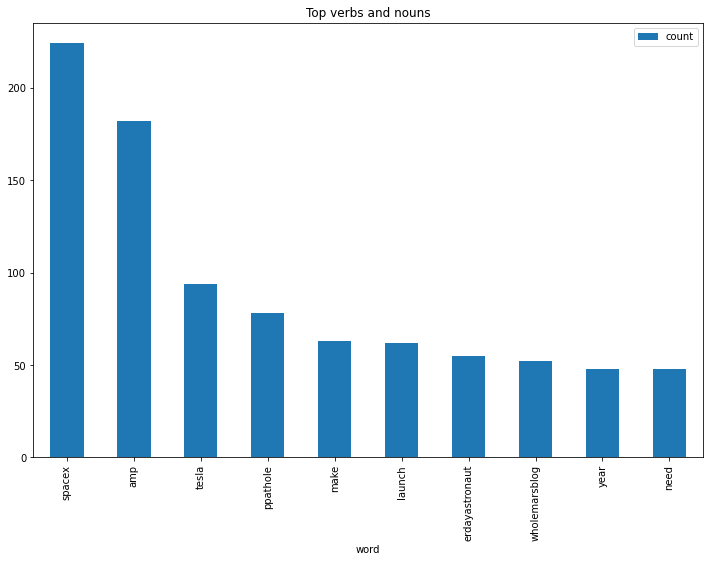

In [57]:
## Visualizing results
## Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word',figsize = (12,8),title='Top verbs and nouns')
plt.show()

## Emotion Mining - sentiment analysis

In [58]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(' '.join(data))
sentence

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [59]:
sent_df = pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can’t b… ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [61]:
## Emotion Lexican - Affin
affin = pd.read_csv("//Users//sreeramkn//Downloads//Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [62]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [63]:
## Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [64]:
## test that it works
calculate_sentiment(text = 'amazing')

4

In [65]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [66]:
## how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
909    11
910    31
911     3
912    47
913    15
Name: word_count, Length: 914, dtype: int64

In [67]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
640,Very ba… https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
828,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the “poor inventor” card, but was ric...",-5,34
910,"It may never pay out, as the stock can’t b… ht...",-4,31
...,...,...,...
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14,138
710,We just haven’t observed the… https://t.co/mez...,15,72
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [68]:
## Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.358862
std        2.698889
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [69]:
## negative Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can’t b… ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [70]:
## positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go … @CapybaraSurfer @MattWalla...,4,39
...,...,...,...
901,He was one of the very best.,3,7
903,"@Ali_Afshari In general, we need to improve ho...",4,87
905,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
907,This is both great &amp; terrifying.,3,6


In [71]:
## Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can’t b… ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


/Users/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

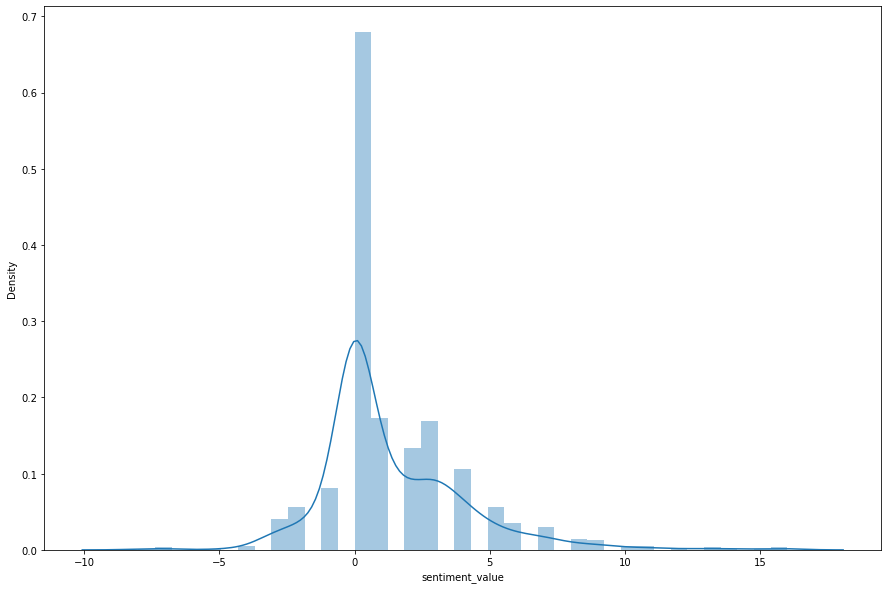

In [72]:
## Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

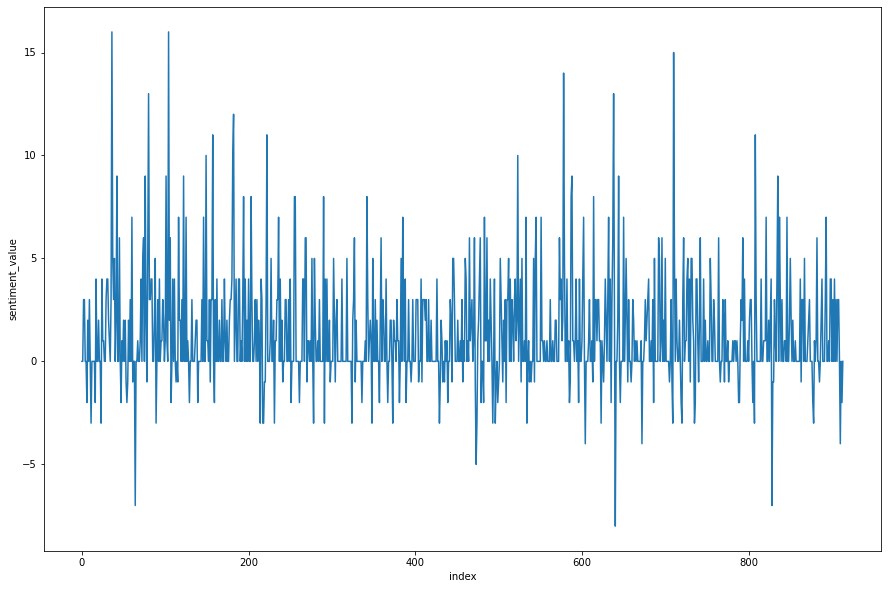

In [73]:
## Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)